# Homework 5: Neural Networks for Recognition

#### **For each question please refer to the handout for more details.**

Programming questions begin at **Q2**. **Remember to run all cells** and save the notebook to your local machine as a pdf for gradescope submission.


Pablo Agustin Ortega Kral (portegak)
---

# Q1 Theory


## Q1.1 (3 points)

Softmax is defined as below, for each index $i$ in a vector $x \in \mathbb{R}^d$.
$$ softmax(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}} $$
Prove that softmax is invariant to translation, that is
$$ softmax(x) = softmax(x + c) \quad \forall c \in \mathbb{R}.$$    

**A:**

By expanding softmax we see that

$$\text{softmax}(x+c) = \frac{e^{x_i + c}}{\sum_j e^{x_j +c}}$$

By separating the exponentiation sum, we can re-write as 
$$\text{softmax}(x+c) = \frac{e^{x_i} e^{c}}{\sum_j e^{x_j} e^{c}}$$
$$\text{softmax}(x+c) = \frac{e^{c} e^{x_i} }{e^{c} \sum_j e^{x_j} }$$
$$\text{softmax}(x+c) = \frac{e^{c}}{e^{c}} \cdot \frac{e^{x_i} }{ \sum_j e^{x_j} } = 1 \cdot \frac{e^{x_i} }{ \sum_j e^{x_j} }$$

Therefore,

$$\text{softmax}(x+c) = \text{softmax}(x)$$


## Q1.1 (3 points)

Often we use $c = -\max x_i$. Why is that a good idea? (Tip: consider the range of values that numerator will have with $c=0$ and $c = -\max x_i$)

**A:** By substracting the max we are esssentially limiting the magnitude that the numerator can take, given that is an exponentiation large numbers can result in high values and cause numerical inestability, floating point and overflow issues. 

By subtracting the maximum of the vector, the range of exponents for the numerator becomes $[\text{min } x_i - \text{max } x_i, 0]$, thus the maximum value of the numerator is capped at 1.

## Q1.2

Softmax can be written as a three-step process, with $s_i = e^{x_i}$, $S = \sum s_i$ and $softmax(x)_i = \frac{1}{S} s_i$.

### Q1.2.1 (1 point)

As $x \in \mathbb{R}^d$, what are the properties of $softmax(x)$, namely what is the range of each element? What is the sum over all elements?

**A:**

- $s_i$ has the range of the exponential function, meaning that for any real $x_i$ $s_i > 0$. Thus, $s_i \in (0, \inf)$
- $\sum s_i$, given that is the sum of exponetials it shares the same range, however the denominator will be greator than any single term $S > s_i$
- $\frac{1}{S}s_i$, given that $S$ is greater than any $s_i$ the ratio must always be below 1, $\frac{1}{S}s_i < 1$. Given that the numerator will never be 0.

$$ \frac{1}{S}s_i \in (0,1) $$


### Q1.2.2 (1 point)

One could say that softmax takes an arbitrary real valued vector $x$ and turns it into a **_probability distribution_**.



**A:** We can see that by applying each of the steps in softmax, the resulting elements comply with the properties of a probability distribution

- All elements are positive.
- Range is $(0,1)$
- The sum of elements is 1 $\sum_i \text{softmax}(x) = 1$

### Q1.2.3 (1 point)

Now explain the role of each step in the multi-step process.

**A:**

- $s_i = e^{x_i}$ maps each element to a nonegative space, where increasing $x_i$ results in increasing the magnitude of $s_i$.

- $S = \sum s_i$ provides a normalization term. By taking the sum of the exponentiation, we ensure that no single element of $s_i$ will be larger than $S$ and therefore the ration will always be below 1.

- $1/S s_i$ by applying the normalization term we ensure that each element is the resulting vector is a nonegative in the range $(0,1)$ and will sum up to 1.

## Q1.3 (3 points)

Show that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.




**A:** A multilayer network with no non-linear action function between layers is a single linear transformation. Assuming a network with $L$ layers, 

$$ y = W^L(W^{L-1}(\dots (W^1x + b^{1})) + b^{L-1}) + b^L$$

The matrix of weights can be all combined into an effective weight matrix, as well as the bias vectors.

$$ y = Wx + b$$

Thefore, by trainig this nework, we are essentially solving the linear regresion problem.

## Q1.4 (3 points)

Given the sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$, derive the gradient of the sigmoid function and show that it can be written as a function of $\sigma(x)$ (without having access to $x$ directly).

**A:** Applying the chain rule,

$$ \frac{d}{dx} \sigma (x) = \frac{e^{-x}}{(1+e^{-x})^2}$$

Expanding, 

$$ \frac{d}{dx} \sigma (x) = \frac{e^{-x}}{1+e^{-x}} \frac{1}{1+e^{-x}}$$

We can further express 

$$ \frac{e^{-x}}{1+e^{-x}} =  \frac{(1+e^{-x}) -1}{1+e^{-x}} = \frac{(1+e^{-x})}{1+e^{-x}} - \frac{1}{1+e^{-x}} = 1 - \frac{1}{1+e^{-x}}$$

$$ \frac{d}{dx} \sigma (x) = (1 - \frac{1}{1+e^{-x}})\frac{1}{1+e^{-x}}$$

We can then subsitute $\sigma (x)$ into the expression such that,

$$ \frac{d}{dx} \sigma (x) = (1 - \sigma (x)) \sigma (x)$$

Therefore, the derivative of sigma can be expressed entirely in terms of itself, without needing access to $x$.


## Q1.5 (12 points)

Given $y = Wx + b$ (or $y_i = \sum_{j=1}^d  x_{j} W_{ij} + b_i$), and the gradient of some loss $J$ (a scalar) with respect to $y$, show how to get the gradients $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$. Be sure to do the derivatives with scalars and re-form the matrix form afterwards. Here are some notional suggestions.
$$ x \in \mathbb{R}^{d \times 1} \quad y \in \mathbb{R}^{k \times 1} \quad W \in \mathbb{R}^{k \times d} \quad b \in \mathbb{R}^{k \times 1} \quad \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{k \times 1} $$

**A:** 

Gicen that $J$ is a loss respect to $y$ and were are giving the value of it's partial, we can use it to build the other expressions through chain rule.

1. $\frac{\partial J}{\partial W}$

$$ \frac{\partial J}{\partial W_{ij}} = \sum_{n = 1}^{k} \frac{\partial J}{\partial y_n} \frac{\partial y_n}{\partial W_{ij}}  $$

Given that $\frac{\partial J}{\partial y_n}$ is a scalar,

$$ \frac{\partial J}{\partial W_{ij}} = \sum_{n = 1}^{k} \delta_n \frac{\partial y_n}{\partial W_{ij}}  $$

Given that $y_n = W_{ij} x_j + b_n$, we see that we only can take a partial derivative when $n$ is a row of $W_{ij}$, such that

$$ \frac{\partial J}{\partial W_{ij}} =  \sum_{n = 1}^{k} \delta_n x_j = \delta_i x_j$$

In matrix form, 

$$ \frac{\partial J}{\partial W} = \delta \cdot x^T$$
---

2. $\frac{\partial J}{\partial x}$

$$ = \sum_{n = 1}^{k} \frac{\partial J}{\partial y_n} \frac{\partial y_n}{\partial x_j} $$

We can see that $\frac{\partial y_n}{\partial x_j} = W_{nj}$, therefore

$$ = \sum_{n = 1}^{k} \delta_n W_{nj} $$

In matrix for, 

$$\frac{\partial J}{\partial x} = W^T \delta$$

---

3. $\frac{\partial J}{\partial b}$

$$ = \sum_{n = 1}^{k} \frac{\partial J}{\partial y_n} \frac{\partial y_n}{\partial b_i} $$
$$ = \sum_{n = 1}^{k} \delta_n \frac{\partial y_n}{\partial b_i}$$

Again, we can only take a partial derivative when $n == 1$. In this case, $y_n = W_{ij}x_j + b_i \therefore \frac{\partial y_n}{\partial b_i} = 1$.

$$ = \sum_{n = 1}^{k} \delta_n 1$$

In matrix form, 

$$ \frac{\partial J}{\partial b} = \delta $$


## Q1.6
When the neural network applies the elementwise activation function (such as sigmoid), the gradient of the activation function scales the backpropogation update. This is directly from the chain rule, $\frac{d}{d x} f(g(x)) = f'(g(x)) g'(x)$.

### Q1.6.1 (1 point)

Consider the sigmoid activation function for deep neural networks. Why might it lead to a "vanishing gradient" problem if it is used for many layers (consider plotting the gradient you derived in Q1.4)?

**A:** Recall that $ \sigma (x)^{\prime} = (1 - \sigma (x)) \sigma (x)$. This means that the derivative has a range of values between $[0,0.25]$. When considering this within the chain rule, we are essentially scaling down each layer by multiplying by small magnitudes (or in some cases en 0!). Because of this, sigmoids should be restricted to the output layer of the network.

### Q1.6.2 (1 point)
Often it is replaced with $\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$. What are the output ranges of both $\tanh$ and sigmoid? Why might we prefer $\tanh$?

- $\sigma (x) \in (0,1)$ 
- $\tanh (x) \in (-1,1)$

We can see that the lower bound of tanh is -1. One nice property of this is we have effectively double the expressive range when compared to sigmoid. Other benefits include that tanh is symetric respect to the origin, which can help to produce more evenly sampled gradients which in turn can aid in smoother convergance.

### Q1.6.3 (1 point)
Why does $\tanh(x)$ have less of a vanishing gradient problem? (plotting the gradients helps! for reference: $\tanh'(x) = 1 - \tanh(x)^2$)

*A:* Even though the lower bound of the gradient is still 0, meaning that vanishing gradeints could still occur, we see that most values are around 1, leadign to less reduction of the gradient on average.

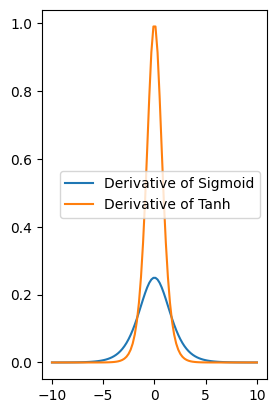

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1 / (1 + np.exp(-x))

def sigma_prime(x):
    return sigma(x) * (1 - sigma(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

ax = plt.subplot(1, 2, 1)
x = np.linspace(-10, 10, 100)
ax.plot(x, sigma_prime(x), label='Derivative of Sigmoid')
ax.plot(x, tanh_prime(x), label='Derivative of Tanh')
ax.legend()
plt.show()


### Q1.6.4 (1 point)
$\tanh$ is a scaled and shifted version of the sigmoid. Show how $\tanh(x)$ can be written in terms of $\sigma(x)$.

Considering $\sigma (x) = \frac{1}{1+e^-x} \therefore \sigma (2x) = \frac{1}{1+e^-2x} $.

We begin by rewritting the numerator in terms of $1+e^-2x$,

$$ \text{tanh}(x) = \frac{2-(1+e^{-2x})}{1 + e^{-2x}} $$
$$ \text{tanh}(x) = \frac{2}{1 + e^{-2x}} - \frac{(1+e^{-2x})}{1 + e^{-2x}}$$
$$ \text{tanh}(x) = \frac{2}{1 + e^{-2x}} - 1$$

There we can see that,

$$ \text{tanh}(x) = 2\sigma(2x) - 1$$


# Q2 Implement a Fully Connected Network

Run the following code to import the modules you'll need. When implementing the functions in Q2, make sure you run the test code (provided after Q2.3) along the way to check if your implemented functions work as expected.

In [2]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches
from mpl_toolkits.axes_grid1 import ImageGrid

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.filters
import skimage.morphology
import skimage.segmentation

## Q2.1 Network Initialization

### Q2.1.1 (3 points)

Why is it not a good idea to initialize a network with all zeros? If you imagine that every layer has weights and biases, what can a zero-initialized network output be after training?

**A:**  Setting initial values as 0 cause all layers to give the same output and the same gradient, meaning that the layers would be updated uniformly. This could result in the network giving the same output regardless of the input features.

### Q2.1.2 (3 points)

Implement the initialize_weights() function to initialize the weights for a single layer with Xavier initialization, where $Var[w] = \frac{2}{n_{in}+ n_{out}} $ where $n$ is the dimensionality of the vectors and you use a uniform distribution to sample random numbers (see eq 16 in [Glorot et al]).

In [3]:
############################## Q 2.1.2 ##############################
def initialize_weights(in_size, out_size, params, name=''):
    """
    we will do XW + b, with the size of the input data array X being [number of examples, in_size]
    the weights W should be initialized as a 2D array
    the bias vector b should be initialized as a 1D array, not a 2D array with a singleton dimension
    the output of this layer should be in size [number of examples, out_size]
    """
    W, b  = None, None
    bound = np.sqrt(6) / np.sqrt(in_size + out_size) # Use the formula for Xavier initialization
    W     = np.random.uniform(-bound, bound, (in_size, out_size))
    b    = np.zeros((out_size)) # Bias is a 1D array
    
    params['W' + name] = W
    params['b' + name] = b

### Q2.1.3 (2 points)

Why do we scale the initialization depending on layer size (see Fig 6 in the [Glorot et al])?

 **A:** By applying this, we can ensure more consistency between action values accross all the layers. This prevents a single layer from dominating with a peak value.

## Q2.2 Forward Propagation

### Q2.2.1 (4 points)

Implement the sigmoid() function, which computes the elementwise sigmoid activation of entries in an input array. Then implement the forward() function which computes forward propagation for a single layer, namely $y = \sigma(X W + b)$.

In [4]:
############################## Q 2.2.1 ##############################
def sigmoid(x):
    """
    Implement an elementwise sigmoid activation function on the input x,
    where x is a numpy array of size [number of examples, number of output dimensions]
    """
    res = None
    res = 1 / (1 + np.exp(-x))
    return res

In [5]:
############################## Q 2.2.1 ##############################
def forward(X,params,name='',activation=sigmoid):
    """
    Do a forward pass for a single layer that computes the output: activation(XW + b)

    Keyword arguments:
    X -- input numpy array of size [number of examples, number of input dimensions]
    params -- a dictionary containing parameters, as how you initialized in Q 2.1.2
    name -- name of the layer
    activation -- the activation function (default is sigmoid)
    """
    # compute the output values before and after the activation function
    pre_act, post_act = None, None
    # get the layer parameters
    W = params['W' + name]
    b = params['b' + name]

    pre_act  = X @ W + b
    post_act = activation(pre_act)

    params['cache_' + name] = (X, pre_act, post_act)

    return post_act

### Q2.2.2 (3 points)

Implement the softmax() function. Be sure to use the numerical stability trick you derived in Q1.1 softmax.

In [6]:
############################## Q 2.2.2  ##############################
def softmax(x, numerically_stable=True):
    """
    x is a numpy array of size [number of examples, number of classes]
    softmax should be done for each row
    """
    res = None
    vals = np.exp(x) 
    if numerically_stable:
        # Subtract the max value in each row to avoid overflow
        max_vals = np.max(x, axis=-1, keepdims=True)
        vals = np.exp(x - max_vals)
    norm_factor = np.sum(vals, axis=-1, keepdims=True)
    
    res = vals / norm_factor
    assert np.allclose(np.sum(res, axis=-1), 1), "Softmax output should sum to 1"
    return res

test_softmax = np.array([[1, 2, 3], [4, 5, 6]])
print(softmax(test_softmax))

[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


### Q2.2.3 (3 points)

Implement the compute_loss_and_acc() function to compute the accuracy given a set of labels, along with the scalar loss across the data. The loss function generally used for classification is the cross-entropy loss.

$$L_{f}(\mathbf{D}) = - \sum_{(x, y)\in \mathbf{D}}y \cdot \log(f(x))$$

Here $\mathbf{D}$ is the full training dataset of $N$ data samples $x$ (which are $D \times 1$ vectors, $D$ is the dimensionality of data) and labels $y$ (which are $C\times 1$ one-hot vectors, $C$ is the number of classes), and $f:\mathbb{R}^D\to[0,1]^C$ is the classifier which outputs the probabilities for the classes.
The $\log$ is the natural $\log$.

In [7]:
############################## Q 2.2.3 ##############################
def compute_loss_and_acc(y, probs):
    """
    compute total loss and accuracy

    Keyword arguments:
    y -- the labels, which is a numpy array of size [number of examples, number of classes]
    probs -- the probabilities output by the classifier, i.e. f(x), which is a numpy array of size [number of examples, number of classes]
    """    
    loss, acc = None, None
    # Using cross-entropy loss
    loss = -np.sum(y * np.log(probs))
    
    gt = np.argmax(y, axis=1)
    preds = np.argmax(probs, axis=1)
    
    acc = np.sum(gt == preds) / len(gt)
    
    return loss, acc

## Q2.3 Backwards Propagation

### Q2.3 (7 points)

Implement the backwards() function to compute backpropagation for a single layer, given the original weights, the appropriate intermediate results, and the gradient with respect to the loss. You should return the gradient with respect to the inputs (grad_X) so that it can be used in the backpropagation for the previous layer. As a size check, your gradients should have the same dimensions as the original objects.


In [8]:
############################## Q 2.3 ##############################
def sigmoid_deriv(post_act):
    """
    we give this to you, because you proved it in Q1.4
    it's a function of the post-activation values (post_act)
    """
    res = post_act*(1.0-post_act)
    return res

def backwards(delta,params,name='',activation_deriv=sigmoid_deriv):
    """
    Do a backpropagation pass for a single layer.

    Keyword arguments:
    delta -- gradients of the loss with respect to the outputs (errors to back propagate), in [number of examples, number of output dimensions]
    params -- a dictionary containing parameters, as how you initialized in Q 2.1.2
    name -- name of the layer
    activation_deriv -- the derivative of the activation function
    """
    grad_X, grad_W, grad_b = None, None, None
    # everything you may need for this layer
    W = params['W' + name]
    b = params['b' + name]
    X, pre_act, post_act = params['cache_' + name]

    # by the chain rule, do the derivative through activation first
    # (don't forget activation_deriv is a function of post_act)
    # then compute the gradients w.r.t W, b, and X
    f_prime = activation_deriv(post_act)
    grad_act = delta * f_prime
    
    grad_W  = X.T @ grad_act
    grad_X  = grad_act @ W.T
    grad_b  = np.sum(grad_act, axis=0)

    # store the gradients
    params['grad_W' + name] = grad_W
    params['grad_b' + name] = grad_b
    return grad_X

Make sure you run below test code along the way to check if your implemented functions work as expected.

In [9]:
def linear(x):
    # Define a linear activation, which can be used to construct a "no activation" layer
    return x

def linear_deriv(post_act):
    return np.ones_like(post_act)

In [10]:
# test code
# generate some fake data
# feel free to plot it in 2D, what do you think these 4 classes are?
g0 = np.random.multivariate_normal([3.6,40],[[0.05,0],[0,10]],10)
g1 = np.random.multivariate_normal([3.9,10],[[0.01,0],[0,5]],10)
g2 = np.random.multivariate_normal([3.4,30],[[0.25,0],[0,5]],10)
g3 = np.random.multivariate_normal([2.0,10],[[0.5,0],[0,10]],10)
x = np.vstack([g0,g1,g2,g3])

# we will do XW + B in the forward pass
# this implies that the data X is in [number of examples, number of input dimensions]

# create labels
y_idx = np.array([0 for _ in range(10)] + [1 for _ in range(10)] + [2 for _ in range(10)] + [3 for _ in range(10)])
# turn to one-hot encoding, this implies that the labels y is in [number of examples, number of classes]
y = np.zeros((y_idx.shape[0],y_idx.max()+1))
y[np.arange(y_idx.shape[0]),y_idx] = 1
print("data shape: {} labels shape: {}".format(x.shape, y.shape))

# parameters in a dictionary
params = {}

# Q 2.1.2
# we will build a two-layer neural network
# first, initialize the weights and biases for the two layers
# the first layer, in_size = 2 (the dimension of the input data), out_size = 25 (number of neurons)
initialize_weights(2,25,params,'layer1')
# the output layer, in_size = 25 (number of neurons), out_size = 4 (number of classes)
initialize_weights(25,4,params,'output')
assert(params['Wlayer1'].shape == (2,25))
assert(params['blayer1'].shape == (25,))
assert(params['Woutput'].shape == (25,4))
assert(params['boutput'].shape == (4,))

# with Xavier initialization
# expect the means close to 0, variances in range [0.05 to 0.12]
print("Q 2.1.2: {}, {:.2f}".format(params['blayer1'].mean(),params['Wlayer1'].std()**2))
print("Q 2.1.2: {}, {:.2f}".format(params['boutput'].mean(),params['Woutput'].std()**2))

# Q 2.2.1
# implement sigmoid
# there might be an overflow warning due to exp(1000)
test = sigmoid(np.array([-1000,1000]))
print('Q 2.2.1: sigmoid outputs should be zero and one\t',test.min(),test.max())
# a forward pass on the first layer, with sigmoid activation
h1 = forward(x,params,'layer1',sigmoid)
assert(h1.shape == (40, 25))

# Q 2.2.2
# implement softmax
# a forward pass on the second layer (the output layer), with softmax so that the outputs are class probabilities
probs = forward(h1,params,'output',softmax)
# make sure you understand these values!
# should be positive, 1 (or very close to 1), 1 (or very close to 1)
print('Q 2.2.2:',probs.min(),min(probs.sum(1)),max(probs.sum(1)))
assert(probs.shape == (40,4))

# Q 2.2.3
# implement compute_loss_and_acc
loss, acc = compute_loss_and_acc(y, probs)
# should be around -np.log(0.25)*40 [~55] or higher, and 0.25
# if it is not, check softmax!
print("Q 2.2.3 loss: {}, acc:{:.2f}".format(loss,acc))

# Q 2.3
# here we cheat for you, you can use it in the training loop in Q2.4
# the derivative of cross-entropy(softmax(x)) is probs - 1[correct actions]
delta1 = probs - y

# backpropagation for the output layer
# we already did derivative through softmax when computing delta1 as above
# so we pass in a linear_deriv, which is just a vector of ones to make this a no-op
delta2 = backwards(delta1,params,'output',linear_deriv)
# backpropagation for the first layer
backwards(delta2,params,'layer1',sigmoid_deriv)

# the sizes of W and b should match the sizes of their gradients
for k,v in sorted(list(params.items())):
    if 'grad' in k:
        name = k.split('_')[1]
        # print the size of the gradient and the size of the parameter, the two sizes should be the same
        print('Q 2.3',name,v.shape, params[name].shape)

data shape: (40, 2) labels shape: (40, 4)
Q 2.1.2: 0.0, 0.08
Q 2.1.2: 0.0, 0.08
Q 2.2.1: sigmoid outputs should be zero and one	 0.0 1.0
Q 2.2.2: 0.11800318131235249 0.9999999999999998 1.0000000000000002
Q 2.2.3 loss: 60.63621753535934, acc:0.23
Q 2.3 Wlayer1 (2, 25) (2, 25)
Q 2.3 Woutput (25, 4) (25, 4)
Q 2.3 blayer1 (25,) (25,)
Q 2.3 boutput (4,) (4,)


/tmp/ipykernel_2480756/3225249788.py:8: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-x))


## Q2.4 Training Loop: Stochastic Gradient Descent

### Q2.4 (5 points)
Implement the get_random_batches() function that takes the entire dataset (x and y) as input and splits it into random batches. Write a training loop that iterates over the batches, does forward and backward propagation, and applies a gradient update. The provided code samples batch only once, but it is also common to sample new random batches at each epoch. You may optionally try both strategies and note any difference in performance.

In [11]:
############################## Q 2.4 ##############################
def get_random_batches(x,y,batch_size):
    """
    split x (data) and y (labels) into random batches
    return a list of [(batch1_x,batch1_y)...]
    """
    import random
    batches = []

    # shuffle the data
    data = list(zip(x, y))
    random.shuffle(data)
    x, y = zip(*data)
    
    x = np.array(x)
    y = np.array(y)
    
    for i in range(0, len(x), batch_size):
        x_sample = x[i:i + batch_size]
        y_sample = y[i:i + batch_size]
        batches.append((x_sample, y_sample))
    
    return batches

In [12]:
# Q 2.4
batches = get_random_batches(x,y,5)
batch_num = len(batches)
# print batch sizes
print([_[0].shape[0] for _ in batches])
print(batch_num)

[5, 5, 5, 5, 5, 5, 5, 5]
8


In [13]:
############################## Q 2.4 ##############################
# WRITE A TRAINING LOOP HERE
max_iters = 500
learning_rate = 1e-3
# with default settings, you should get loss <= 35 and accuracy >= 75%
layers = ['layer1', 'output']
for itr in range(max_iters):
    total_loss = 0
    avg_acc = 0
    for xb,yb in batches:
        # forward
        features = forward(xb, params, layers[0], sigmoid)
        out_prob = forward(features,params ,layers[1], softmax)
        # loss
        loss, acc  = compute_loss_and_acc(yb, out_prob)
        total_loss += loss 
        avg_acc    += acc  / batch_num  
        # backward
        grad0 = out_prob - yb
        grad_prev = backwards(grad0, params, layers[1], linear_deriv)
        for l in layers[0::-1]:
            grad_prev = backwards(grad_prev, params, l, sigmoid_deriv)
        
        # apply gradient to update the parameters
        for l in layers:
            params['W' + l] -= learning_rate * params['grad_W' + l]
            params['b' + l] -= learning_rate * params['grad_b' + l]
        
    if itr % 100 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,avg_acc))

itr: 00 	 loss: 59.50 	 acc : 0.38
itr: 100 	 loss: 42.46 	 acc : 0.58
itr: 200 	 loss: 35.45 	 acc : 0.72
itr: 300 	 loss: 31.35 	 acc : 0.78
itr: 400 	 loss: 28.57 	 acc : 0.82


# Q3 Training Models

Run below code to download and put the unzipped data in '/content/data' folder.

We have provided you three data .mat files to use for this section.
The training data in nist36_train.mat contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network.
The cross-validation set in nist36_valid.mat contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot overfitting.
Finally, the test data in nist36_test.mat contains testing data, and should be used for the final evaluation of your best model to see how well it will generalize to new unseen data.

In [14]:
if not os.path.exists('data'):
  os.mkdir('data')
  !wget http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip -O data/data.zip
  !unzip "data/data.zip" -d "data"
  os.system("rm data/data.zip")

In [15]:
ls ./data

nist26_model_60iters.mat*  nist26_valid.mat*  nist36_valid.mat*
nist26_test.mat*           nist36_test.mat*   q3_weights.pickle
nist26_train.mat*          nist36_train.mat*


## Q3.1 (5 points)

Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 50 epochs. The script will generate two plots:
    
(1) the accuracy on both the training and validation set over the epochs, and
    
(2) the cross-entropy loss averaged over the data.
    
Tune the batch size and learning rate for accuracy on the validation set of at least 75\%. Hint: Use fixed random seeds to improve reproducibility.

train_x shape:  (10800, 1024)


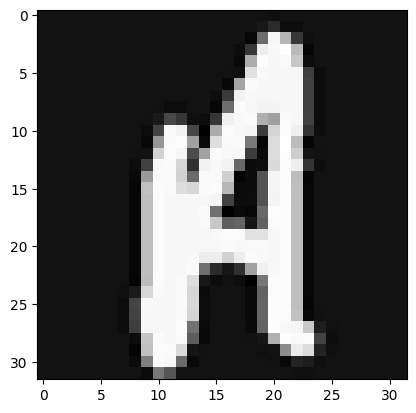

In [16]:
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
test_data = scipy.io.loadmat('data/nist36_test.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']
test_x, test_y = test_data['test_data'], test_data['test_labels']

print("train_x shape: ", train_x.shape)

if True: # view the data
    for crop in train_x:
        plt.imshow(crop.reshape(32,32).T, cmap="Greys")
        plt.show()
        break

In [ ]:
############################## Q 3.1 ##############################
def train_nist(
    max_iters = 50,
    batch_size = 32,
    learning_rate = 2e-3,
    hidden_size = 64,
    seed = 15,
    return_probs = False,
):
    np.random.seed(seed)

    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}

    # initialize layers
    initialize_weights(train_x.shape[1], hidden_size, params, "layer1")
    initialize_weights(hidden_size, train_y.shape[1], params, "output")
    global layer1_W_initial 
    layer1_W_initial = np.copy(params["Wlayer1"]) # copy for Q3.3

    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []
    for itr in range(max_iters):
        total_loss = 0
        avg_acc = 0
        for xb,yb in batches:
            # forward
            features = forward(xb, params, layers[0], sigmoid)
            out_prob = forward(features,params ,layers[1], softmax)
            # loss
            loss, acc  = compute_loss_and_acc(yb, out_prob)
            total_loss += loss 
            avg_acc    += acc  / batch_num  
            # backward
            grad0 = out_prob - yb
            grad_prev = backwards(grad0, params, layers[-1], linear_deriv)
            for l in layers[0::-1]:
                grad_prev = backwards(grad_prev, params, l, sigmoid_deriv)
            
            # apply gradient to update the parameters
            for l in layers:
                params['W' + l] -= learning_rate * params['grad_W' + l]
                params['b' + l] -= learning_rate * params['grad_b' + l]
        # record training and validation loss and accuracy for plotting
        h1 = forward(train_x,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)
        loss, acc = compute_loss_and_acc(train_y, probs)
        train_loss.append(loss/train_x.shape[0])
        train_acc.append(acc)

        h1 = forward(valid_x,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)
        loss, acc = compute_loss_and_acc(valid_y, probs)
        valid_loss.append(loss/valid_x.shape[0])
        valid_acc.append(acc)



        if itr % 2 == 0:
            print("itr: {:02d}   loss: {:.2f}   acc: {:.2f}".format(itr,total_loss,avg_acc))

    # record final training and validation accuracy and loss
    h1 = forward(train_x,params,'layer1',sigmoid)
    train_probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(train_y, train_probs)
    train_loss.append(loss/train_x.shape[0])
    train_acc.append(acc)

    h1 = forward(valid_x,params,'layer1',sigmoid)
    val_probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(valid_y, val_probs)
    valid_loss.append(loss/valid_x.shape[0])
    valid_acc.append(acc)

    # report validation accuracy; aim for 75%
    print('Validation accuracy: ', valid_acc[-1])

    # compute and report test accuracy
    h1 = forward(test_x,params,'layer1',sigmoid)
    test_probs = forward(h1,params,'output',softmax)
    _, test_acc = compute_loss_and_acc(test_y, test_probs)
    print('Test accuracy: ', test_acc)
    if return_probs:
        return (train_probs, val_probs, test_probs),(train_y, valid_y, test_y)
    return train_loss, valid_loss, train_acc, valid_acc, test_acc, params

train_loss, valid_loss, train_acc, valid_acc, test_acc, params = train_nist()

itr: 00   loss: 37053.48   acc: 0.11
itr: 02   loss: 26061.10   acc: 0.46
itr: 04   loss: 19233.55   acc: 0.58
itr: 06   loss: 15833.52   acc: 0.63
itr: 08   loss: 13948.62   acc: 0.67
itr: 10   loss: 12736.18   acc: 0.69
itr: 12   loss: 11861.02   acc: 0.71
itr: 14   loss: 11178.36   acc: 0.73
itr: 16   loss: 10617.31   acc: 0.74
itr: 18   loss: 10139.35   acc: 0.75
itr: 20   loss: 9721.74   acc: 0.76
itr: 22   loss: 9350.08   acc: 0.77
itr: 24   loss: 9014.65   acc: 0.78
itr: 26   loss: 8708.64   acc: 0.79
itr: 28   loss: 8427.02   acc: 0.79
itr: 30   loss: 8165.95   acc: 0.80
itr: 32   loss: 7922.41   acc: 0.81
itr: 34   loss: 7694.05   acc: 0.81
itr: 36   loss: 7478.97   acc: 0.82
itr: 38   loss: 7275.68   acc: 0.82
itr: 40   loss: 7082.96   acc: 0.83
itr: 42   loss: 6899.80   acc: 0.83
itr: 44   loss: 6725.35   acc: 0.83
itr: 46   loss: 6558.85   acc: 0.84
itr: 48   loss: 6399.64   acc: 0.84
Validation accuracy:  0.7622222222222222
Test accuracy:  0.7661111111111111


In [18]:
# save the final network
import pickle

saved_params = {k:v for k,v in params.items() if '_' not in k}
with open('data/q3_weights.pickle', 'wb') as handle:
  pickle.dump(saved_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

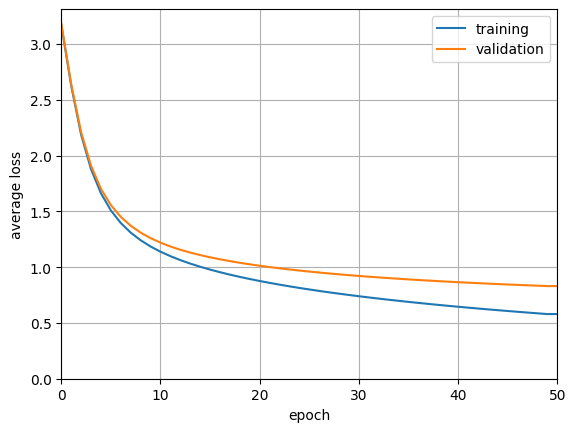

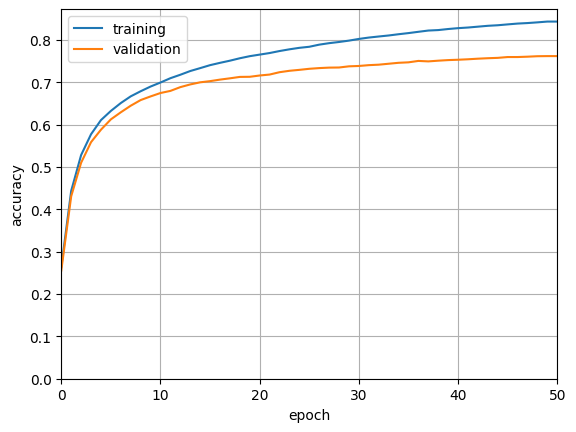

In [19]:
# plot loss curves
def plot_losses(losses):
    train_loss, valid_loss, train_acc, valid_acc, test_acc= losses
    plt.plot(range(len(train_loss)), train_loss, label="training")
    plt.plot(range(len(valid_loss)), valid_loss, label="validation")
    plt.xlabel("epoch")
    plt.ylabel("average loss")
    plt.xlim(0, len(train_loss)-1)
    plt.ylim(0, None)
    plt.legend()
    plt.grid()
    plt.show()

    # plot accuracy curves
    plt.plot(range(len(train_acc)), train_acc, label="training")
    plt.plot(range(len(valid_acc)), valid_acc, label="validation")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.xlim(0, len(train_acc)-1)
    plt.ylim(0, None)
    plt.legend()
    plt.grid()
    plt.show()
plot_losses((train_loss, valid_loss, train_acc, valid_acc, test_acc))

## Q3.2 (3 points)

The provided code will visualize the first layer weights as 64 32x32 images, both immediately after initialization and after full training. Generate both visualizations. Comment on the learned weights and compare them to the initialized weights. Do you notice any patterns?

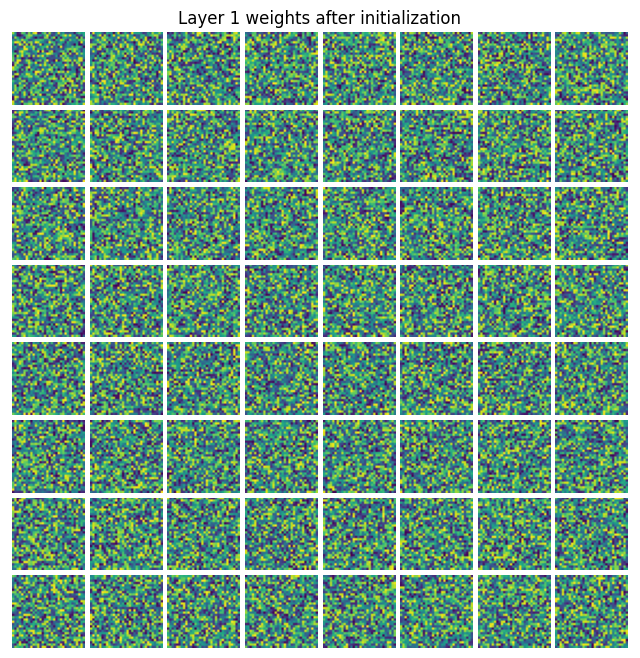

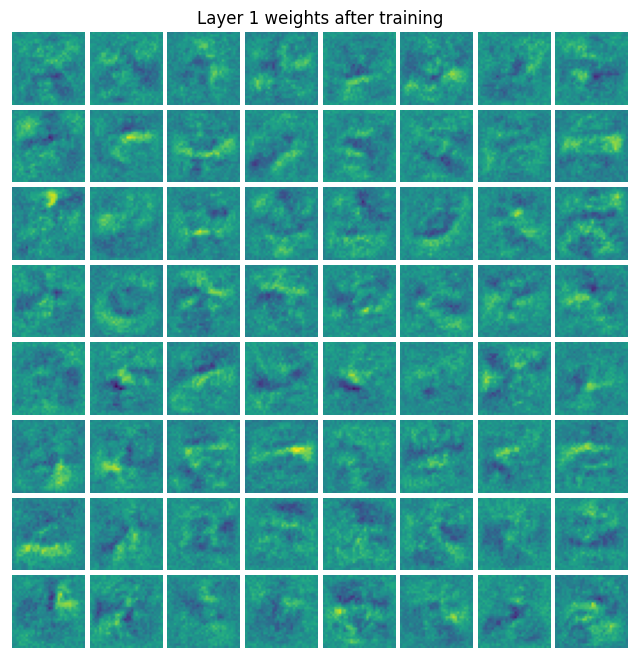

In [20]:
############################## Q 3.2 ##############################
# visualize weights
fig = plt.figure(figsize=(8,8))
plt.title("Layer 1 weights after initialization")
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.05)
for i, ax in enumerate(grid):
    ax.imshow(layer1_W_initial[:,i].reshape((32, 32)).T)
    ax.set_axis_off()
plt.show()

v = np.max(np.abs(params['Wlayer1']))
fig = plt.figure(figsize=(8,8))
plt.title("Layer 1 weights after training")
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.05)
for i, ax in enumerate(grid):
    ax.imshow(params['Wlayer1'][:,i].reshape((32, 32)).T, vmin=-v, vmax=v)
    ax.set_axis_off()
plt.show()

**A:** We can think of the observed patterns as meanigful regions the feature encoder has learnt for the NIST characters. We can see it generally focusses on areas in the middle of the images where the stokes will be. 

## Q3.3 (3 points)

Use the code in Q3.1 to train and generate accuracy and loss plots for each of these three networks:

(1) one with $10$ times your tuned learning rate,
    


itr: 00   loss: 34827.13   acc: 0.11
itr: 02   loss: 19263.72   acc: 0.48
itr: 04   loss: 15455.74   acc: 0.58
itr: 06   loss: 13517.41   acc: 0.64
itr: 08   loss: 12092.09   acc: 0.67
itr: 10   loss: 11508.58   acc: 0.69
itr: 12   loss: 10625.69   acc: 0.71
itr: 14   loss: 10354.82   acc: 0.72
itr: 16   loss: 9639.52   acc: 0.73
itr: 18   loss: 8953.45   acc: 0.75
itr: 20   loss: 8520.80   acc: 0.76
itr: 22   loss: 8008.58   acc: 0.77
itr: 24   loss: 7667.48   acc: 0.78
itr: 26   loss: 7892.66   acc: 0.77
itr: 28   loss: 7648.16   acc: 0.78
itr: 30   loss: 7499.41   acc: 0.79
itr: 32   loss: 7645.24   acc: 0.78
itr: 34   loss: 7497.17   acc: 0.78
itr: 36   loss: 7139.91   acc: 0.79
itr: 38   loss: 7203.04   acc: 0.79
itr: 40   loss: 6881.32   acc: 0.80
itr: 42   loss: 7231.80   acc: 0.79
itr: 44   loss: 6819.81   acc: 0.80
itr: 46   loss: 7220.10   acc: 0.79
itr: 48   loss: 7288.11   acc: 0.79
Validation accuracy:  0.7011111111111111
Test accuracy:  0.715


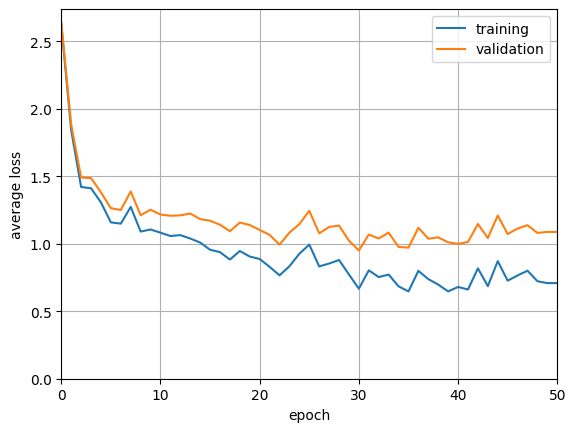

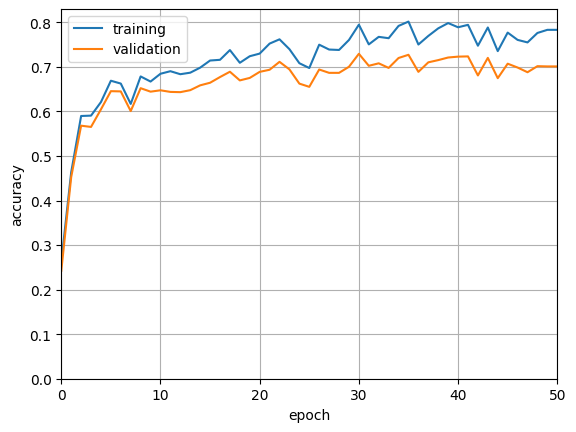

In [21]:
choosen_lr = 2e-3
train_loss, valid_loss, train_acc, valid_acc, test_acc, params = train_nist(learning_rate=10*choosen_lr)
plot_losses((train_loss, valid_loss, train_acc, valid_acc, test_acc))

(2) one with one-tenth your tuned learning rate, and



itr: 00   loss: 38937.34   acc: 0.03
itr: 02   loss: 37830.76   acc: 0.11
itr: 04   loss: 36846.16   acc: 0.20
itr: 06   loss: 35743.11   acc: 0.28
itr: 08   loss: 34562.05   acc: 0.32
itr: 10   loss: 33328.78   acc: 0.36
itr: 12   loss: 32065.07   acc: 0.39
itr: 14   loss: 30804.17   acc: 0.42
itr: 16   loss: 29578.18   acc: 0.44
itr: 18   loss: 28401.89   acc: 0.47
itr: 20   loss: 27285.32   acc: 0.48
itr: 22   loss: 26235.15   acc: 0.50
itr: 24   loss: 25252.21   acc: 0.52
itr: 26   loss: 24334.82   acc: 0.53
itr: 28   loss: 23480.24   acc: 0.54
itr: 30   loss: 22685.18   acc: 0.55
itr: 32   loss: 21946.07   acc: 0.57
itr: 34   loss: 21259.27   acc: 0.58
itr: 36   loss: 20621.07   acc: 0.58
itr: 38   loss: 20027.79   acc: 0.59
itr: 40   loss: 19475.71   acc: 0.60
itr: 42   loss: 18961.53   acc: 0.61
itr: 44   loss: 18482.89   acc: 0.61
itr: 46   loss: 18037.62   acc: 0.62
itr: 48   loss: 17623.22   acc: 0.63
Validation accuracy:  0.6038888888888889
Test accuracy:  0.6138888888888889

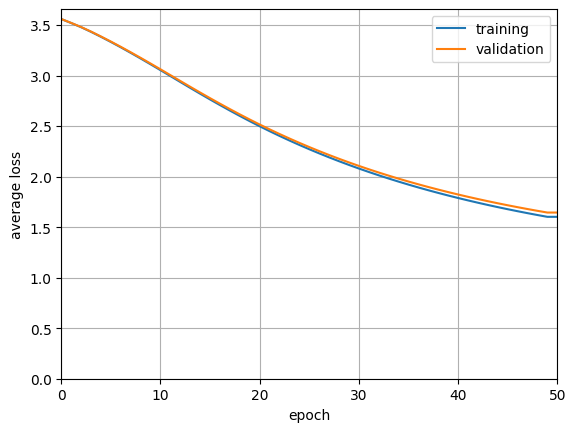

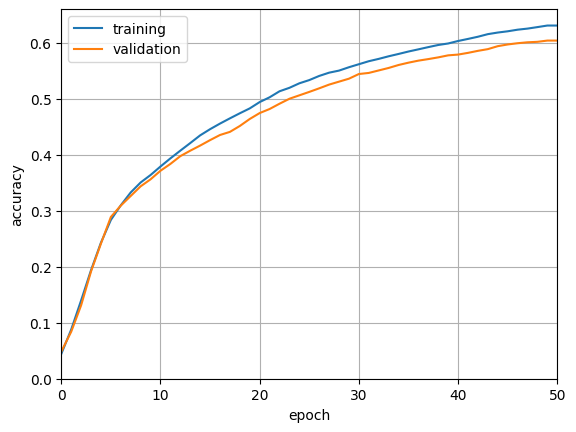

In [22]:
train_loss, valid_loss, train_acc, valid_acc, test_acc, params = train_nist(learning_rate=(1/10)*choosen_lr)
plot_losses((train_loss, valid_loss, train_acc, valid_acc, test_acc))

(3) one with your tuned learning rate.
    
Include total of six plots (two will be the same from Q3.1). Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set. Hint: Use fixed random seeds to improve reproducibility.

itr: 00   loss: 37042.15   acc: 0.11
itr: 02   loss: 26102.36   acc: 0.46
itr: 04   loss: 19280.30   acc: 0.58
itr: 06   loss: 15869.30   acc: 0.64
itr: 08   loss: 13977.70   acc: 0.67
itr: 10   loss: 12762.68   acc: 0.69
itr: 12   loss: 11887.53   acc: 0.71
itr: 14   loss: 11205.92   acc: 0.72
itr: 16   loss: 10646.05   acc: 0.74
itr: 18   loss: 10168.89   acc: 0.75
itr: 20   loss: 9751.37   acc: 0.76
itr: 22   loss: 9378.92   acc: 0.77
itr: 24   loss: 9041.72   acc: 0.78
itr: 26   loss: 8732.91   acc: 0.78
itr: 28   loss: 8447.52   acc: 0.79
itr: 30   loss: 8181.90   acc: 0.80
itr: 32   loss: 7933.32   acc: 0.80
itr: 34   loss: 7699.65   acc: 0.81
itr: 36   loss: 7479.21   acc: 0.82
itr: 38   loss: 7270.59   acc: 0.82
itr: 40   loss: 7072.64   acc: 0.83
itr: 42   loss: 6884.35   acc: 0.83
itr: 44   loss: 6704.87   acc: 0.84
itr: 46   loss: 6533.47   acc: 0.84
itr: 48   loss: 6369.51   acc: 0.85
Validation accuracy:  0.7625
Test accuracy:  0.7644444444444445


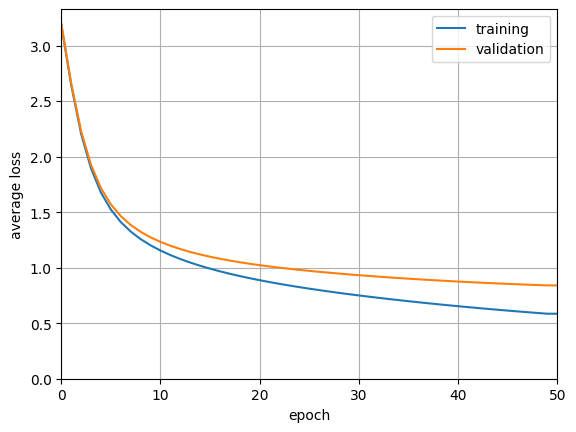

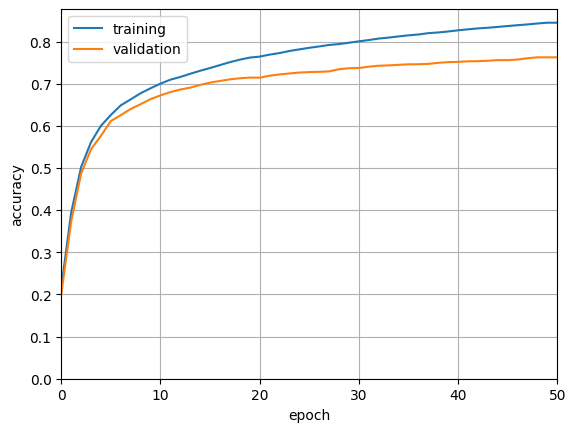

In [23]:
train_loss, valid_loss, train_acc, valid_acc, test_acc, params  = train_nist(learning_rate=choosen_lr)
plot_losses((train_loss, valid_loss, train_acc, valid_acc, test_acc))

**A**: We can see that the learning rate influences how much each gradient step affects the update of the parameters. If the learning reate is to high, each step we take is too large and the optimization problem becomes unstable. When the learning rate is too small, the optimization is smooth but takes longer to converge, meaning that we requiere more epochs to find an optimal solution.

## Q3.4 (3 points)

Compute and visualize the confusion matrix of the test data for your best model. Comment on the top few pairs of classes that are most commonly confused.

itr: 00   loss: 37003.13   acc: 0.12
itr: 02   loss: 26027.80   acc: 0.46
itr: 04   loss: 19222.95   acc: 0.58
itr: 06   loss: 15824.37   acc: 0.64
itr: 08   loss: 13935.71   acc: 0.67
itr: 10   loss: 12722.17   acc: 0.69
itr: 12   loss: 11848.84   acc: 0.71
itr: 14   loss: 11169.50   acc: 0.72
itr: 16   loss: 10612.11   acc: 0.74
itr: 18   loss: 10137.29   acc: 0.75
itr: 20   loss: 9721.69   acc: 0.76
itr: 22   loss: 9350.55   acc: 0.77
itr: 24   loss: 9014.18   acc: 0.78
itr: 26   loss: 8705.94   acc: 0.78
itr: 28   loss: 8421.08   acc: 0.79
itr: 30   loss: 8156.04   acc: 0.80
itr: 32   loss: 7908.11   acc: 0.81
itr: 34   loss: 7675.16   acc: 0.81
itr: 36   loss: 7455.47   acc: 0.82
itr: 38   loss: 7247.63   acc: 0.82
itr: 40   loss: 7050.47   acc: 0.83
itr: 42   loss: 6863.00   acc: 0.83
itr: 44   loss: 6684.36   acc: 0.84
itr: 46   loss: 6513.84   acc: 0.84
itr: 48   loss: 6350.78   acc: 0.85
Validation accuracy:  0.7538888888888889
Test accuracy:  0.7583333333333333


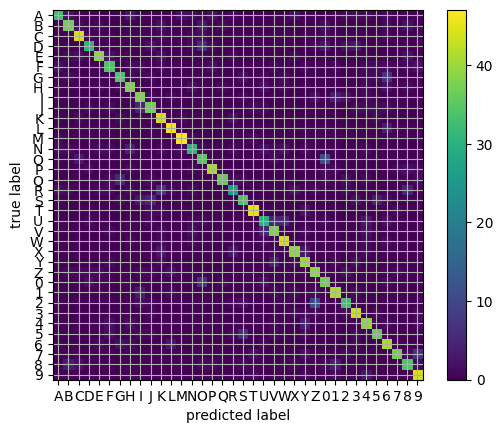

In [24]:
############################## Q 3.4 ##############################
def build_confusion_matrix(pred, gt):
    N = gt.shape[1]
    confusion_matrix = np.zeros((N, N))
    
    for i in range(len(gt)):
        pred_class = np.argmax(pred[i])
        gt_class   = np.argmax(gt[i])
        
        confusion_matrix[gt_class][pred_class] += 1

    return confusion_matrix

(train_probs, val_probs, test_probs),(train_y, valid_y, test_y) = train_nist(learning_rate=choosen_lr, return_probs=True)

test_confusion_matrix = build_confusion_matrix(test_probs, test_y)


# visualize confusion matrix
import string
plt.imshow(test_confusion_matrix,interpolation='nearest')
plt.grid()
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
plt.show()

**A**: We can see that the common confusing modes for the classifier are the numbers that look like letters, for instance "B", and 8". The most prediminant confusion classes are:

1. 0 and "O"
2. Z and "2"

# Q4 Image Compression with Autoencoders

An autoencoder is a neural network that is trained to attempt to copy its input to its output, but it usually allows copying only approximately. This is typically achieved by restricting the number of hidden nodes inside the autoencoder; in other words, the autoencoder would be forced to learn to represent data with this limited number of hidden nodes. This is a useful way of learning compressed representations.

In this section, we will continue using the NIST36 dataset you have from the previous questions.

## Q4.1 Building the Autoencoder

### Q4.1 (4 points)

Due to the difficulty in training auto-encoders, we have to move to the $relu(x) = max(x,0)$ activation function. It is provided for you. We will build an autoencoder with the layers listed below. Initialize the layers with the initialize_weights() function you wrote in Q2.1.2.

- 1024 to 32 dimensions, followed by a ReLU
- 32 to 32 dimensions, followed by a ReLU
- 32 to 32 dimensions, followed by a ReLU
- 32 to 1024 dimensions, followed by a sigmoid (this normalizes the image output for us)

In [83]:
# here we provide the relu activation and its derivative for you
from collections import Counter

def relu(x):
    return np.maximum(x,0)

def relu_deriv(x):
    return (x > 0).astype(float)

############################## Q 4.1 ##############################
params = Counter()

initialize_weights(train_x.shape[1], 32, params, "feat_in")
initialize_weights(32, 32,   params, "h0")
initialize_weights(32, 32,   params, "h1")
initialize_weights(32, 1024, params, "out")

## Q4.2 Training the Autoencoder

### Q4.2.1 (5 points)

To help even more with convergence speed, we will implement momentum. Now, instead of updating $W = W - \alpha \frac{\partial J}{\partial W}$, we will use the update rules $M_W = 0.9 M_W - \alpha \frac{\partial J}{\partial W}$ and $W = W + M_W$. To implement momentum, populate the parameters dictionary with zero-initialized momentum accumulators M, one for each parameter. Then simply perform both update equations for every batch.

### Q4.2.2 (6 points)

Using the provided default settings, train the network for 100 epochs. The loss function that you will use is the total squared error for the output image compared to the input image (they should be the same!). Plot the training loss curve. What do you observe?

itr: 00 	 loss: 876808.22
itr: 02 	 loss: 601130.06
itr: 04 	 loss: 507319.91
itr: 06 	 loss: 454407.01
itr: 08 	 loss: 423470.49
itr: 10 	 loss: 394567.29
itr: 12 	 loss: 386990.62
itr: 14 	 loss: 377574.16
itr: 16 	 loss: 369845.15
itr: 18 	 loss: 358321.66
itr: 20 	 loss: 351444.90
itr: 22 	 loss: 348032.32
itr: 24 	 loss: 345025.69
itr: 26 	 loss: 344104.25
itr: 28 	 loss: 342154.14
itr: 30 	 loss: 341886.45
itr: 32 	 loss: 340322.80
itr: 34 	 loss: 339499.82
itr: 36 	 loss: 339606.02
itr: 38 	 loss: 337272.40
itr: 40 	 loss: 335414.67
itr: 42 	 loss: 332106.96
itr: 44 	 loss: 330313.87
itr: 46 	 loss: 330340.82
itr: 48 	 loss: 329366.47
itr: 50 	 loss: 331888.95
itr: 52 	 loss: 329735.30
itr: 54 	 loss: 329102.62
itr: 56 	 loss: 327800.62
itr: 58 	 loss: 326632.34
itr: 60 	 loss: 328231.20
itr: 62 	 loss: 325543.07
itr: 64 	 loss: 324514.22
itr: 66 	 loss: 323643.57
itr: 68 	 loss: 322997.68
itr: 70 	 loss: 322942.32
itr: 72 	 loss: 322946.71
itr: 74 	 loss: 321696.83
itr: 76 	 lo

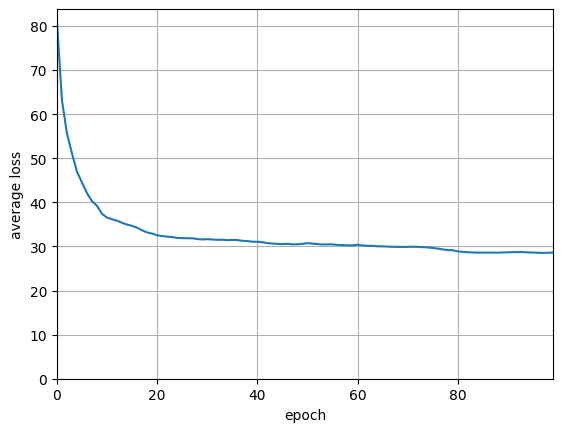

In [84]:
########################### Q 4.2.1 & Q 4.2.2 ########################
# the NIST36 dataset
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

# we don't need labels now!
train_x = train_data['train_data']
valid_x = valid_data['valid_data']

max_iters = 100
# pick a batch size, learning rate
batch_size = 64
learning_rate =  3e-5
hidden_size = 32
lr_rate = 20
batches = get_random_batches(train_x,np.ones((train_x.shape[0],1)),batch_size)
batch_num = len(batches)
layers = {
    'feat_in': relu,
    'h0': relu, 
    'h1':relu,
    'out': sigmoid,
}

for l in layers.keys():
    params['M_W' + l] = np.zeros_like(params['W' + l])
    params['M_b' + l] = np.zeros_like(params['b' + l])


# should look like your previous training loops
losses = []
for itr in range(max_iters):
    total_loss = 0
    for xb,_ in batches:
        # forward
        for l in layers.keys():
            if l == 'feat_in':
                hidden = forward(xb, params, l, activation= layers[l])
            elif l == 'out':
                out_ = forward(hidden, params, l, activation= layers[l])
            else:
                hidden = forward(hidden, params, l, activation= layers[l])
        
        # loss
        loss = np.sum((xb - out_) ** 2)
        total_loss += loss 
        
        # backward
        grad0    = 2*(out_ - xb)
        gradOut  = backwards(grad0, params, 'out', sigmoid_deriv)
        gradH1   = backwards(gradOut, params, 'h1', relu_deriv)
        gradH0   = backwards(gradH1, params, 'h0', relu_deriv)
        gradFeat = backwards(gradH0, params, 'feat_in', relu_deriv)
        
        # apply gradient to update the parameters
        for l in layers.keys():
            params['M_W' + l] = 0.9 * params['M_W' + l] - learning_rate * params['grad_W' + l]
            params['M_b' + l] = 0.9 * params['M_b' + l] - learning_rate * params['grad_b' + l]
            
            params['W' + l] += params['M_W' + l]
            params['b' + l] += params['M_b' + l]
    
    losses.append(total_loss/train_x.shape[0])
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f}".format(itr,total_loss))
    if itr % lr_rate == lr_rate-1:
        learning_rate *= 0.9

# plot loss curve
plt.plot(range(len(losses)), losses)
plt.xlabel("epoch")
plt.ylabel("average loss")
plt.xlim(0, len(losses)-1)
plt.ylim(0, None)
plt.grid()
plt.show()

trained_autoencoder = params.copy()

---

YOUR ANSWER HERE...

---

## Q4.3 Evaluating the Autoencoder

### Q4.3.1 (5 points)

Now let's evaluate how well the autoencoder has been trained. Select 5 classes from the total 36 classes in the validation set and for each selected class show 2 validation images and their reconstruction. What differences do you observe in the reconstructed validation images compared to the original ones?

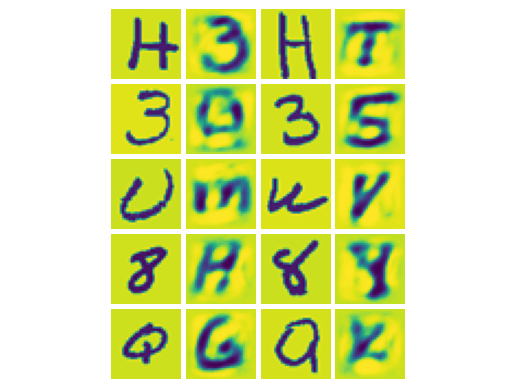

In [85]:
############################## Q 4.3.1 ##############################
# choose 5 classes (change if you want)
visualize_labels = ["H", "3", "U", "8", "Q"]
# get 2 validation images from each label to visualize
visualize_x = np.zeros((2*len(visualize_labels), valid_x.shape[1]))
for i, label in enumerate(visualize_labels):
    idx = 26+int(label) if label.isnumeric() else string.ascii_lowercase.index(label.lower())
    choices = np.random.choice(np.arange(100*idx, 100*(idx+1)), 2, replace=False)
    visualize_x[2*i:2*i+2] = valid_x[choices]

# run visualize_x through your network
# using the forward() function you wrote in Q2.2.1

for l in layers.keys():
    if l == 'feat_in':
        hidden = forward(xb, trained_autoencoder, l, activation= layers[l])
    elif l == 'out':
        out_ = forward(hidden, trained_autoencoder, l, activation= layers[l])
    else:
        hidden = forward(hidden, trained_autoencoder, l, activation= layers[l])
reconstructed_x = out_
# visualize
fig = plt.figure()
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(len(visualize_labels), 4), axes_pad=0.05)
for i, ax in enumerate(grid):
    if i % 2 == 0:
        ax.imshow(visualize_x[i//2].reshape((32, 32)).T)
    else:
        ax.imshow(reconstructed_x[i//2].reshape((32, 32)).T)
    ax.set_axis_off()
plt.show()

---

YOUR ANSWER HERE...

---

### Q4.3.2 (5 points)

Let’s evaluate the reconstruction quality using Peak Signal-to-noise Ratio (PSNR). PSNR is defined as

$$\text{PSNR} = 20 \times \log_{10}(\text{MAX}_I) - 10\times \log_{10}(\text{MSE})$$

where $\text{MAX}_I$ is the maximum possible pixel value of the image, and $\text{MSE}$ (mean squared error) is computed across all pixels. Said another way, maximum refers to the brightest overall sum (maximum positive value of the sum). You may use skimage.metrics.peak_signal_noise_ratio for convenience. Report the average PSNR you get from the autoencoder across all images in the validation set (it should be around 15).

In [ ]:
############################## Q 4.3.2 ##############################
from skimage.metrics import peak_signal_noise_ratio
# evaluate PSNR
##########################
##### your code here #####
##########################



---

YOUR ANSWER HERE...

---

# Q5 (Extra Credit) Extract Text from Images

Run below code to download and put the unzipped data in '/content/images' folder. We have provided you with 01_list.jpg, 02_letters.jpg, 03_haiku.jpg and 04_deep.jpg to test your implementation on.

In [ ]:
if not os.path.exists('/content/images'):
  os.mkdir('/content/images')
  !wget http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip -O /content/images/images.zip
  !unzip "/content/images/images.zip" -d "/content/images"
  os.system("rm /content/images/images.zip")

In [ ]:
ls /content/images

## Q5.1 (Extra Credit) (4 points)

The method outlined above is pretty simplistic, and while it works for the given text samples, it makes several assumptions. What are two big assumptions that the sample method makes?

---

YOUR ANSWER HERE...

---


## Q5.2 (Extra Credit) (10 points)

Implement the findLetters() function to find letters in the image. Given an RGB image, this function should return bounding boxes for all of the located handwritten characters in the image, as well as a binary black-and-white version of the image im. Each row of the matrix should contain [y1,x1,y2,x2], the positions of the top-left and bottom-right corners of the box. The black-and-white image should be between 0.0 to 1.0, with the characters in white and the background in black (consistent with the images in nist36). Hint: Since we read text left to right, top to bottom, we can use this to cluster the coordinates.

In [ ]:
############################## Q 5.2 ##############################
def findLetters(image):
    """
    takes a color image
    returns a list of bounding boxes and black_and_white image
    """
    bboxes = []
    bw = None
    # insert processing in here
    # one idea estimate noise -> denoise -> greyscale -> threshold -> morphology -> label -> skip small boxes
    # this can be 10 to 15 lines of code using skimage functions

    ##########################
    ##### your code here #####
    ##########################


    return bboxes, bw

## Q5.3 (Extra Credit) (3 points)

Using the provided code below, visualize all of the located boxes on top of the binary image to show the accuracy of your findLetters() function. Include all the provided sample images with the boxes.

In [ ]:
############################## Q 5.3 ##############################
# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

for imgno, img in enumerate(sorted(os.listdir('/content/images'))):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('/content/images',img)))
    bboxes, bw = findLetters(im1)

    print('\n' + img)
    plt.imshow(1-bw, cmap="Greys") # reverse the colors of the characters and the background for better visualization
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()

## Q5.4 (Extra Credit) (8 points)

You will now load the image, find the character locations, classify each one with the network you trained in Q3.1, and return the text contained in the image. Be sure you try to make your detected images look like the images from the training set. Visualize them and act accordingly. If you find that your classifier performs poorly, consider dilation under skimage morphology to make the letters thicker.

Your solution is correct if you can correctly detect most of the letters and classify approximately 70\% of the letters in each of the sample images.

Run your code on all the provided sample images in '/content/images'. Show the extracted text. It is fine if your code ignores spaces, but if so, please provide a written answer with manually added spaces.

In [ ]:
############################## Q 5.4 ##############################
for imgno, img in enumerate(sorted(os.listdir('/content/images'))):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('/content/images',img)))
    bboxes, bw = findLetters(im1)
    print('\n' + img)

    # find the rows using..RANSAC, counting, clustering, etc.
    ##########################
    ##### your code here #####
    ##########################



    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset
    ##########################
    ##### your code here #####
    ##########################



    # load the weights
    # run the crops through your neural network and print them out
    import pickle
    import string
    letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
    params = pickle.load(open('/content/q3_weights.pickle','rb'))
    ##########################
    ##### your code here #####
    ##########################



---

YOUR ANSWER HERE... (if your code ignores spaces)

---